11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
300/300 [==============================] - 62s 193ms/step - loss: 0.2465 - accuracy: 0.9303 - val_loss: 0.0745 - val_accuracy: 0.9751
Epoch 2/10
300/300 [==============================] - 48s 160ms/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.0502 - val_accuracy: 0.9847
Epoch 3/10
300/300 [==============================] - 49s 164ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 4/10
300/300 [==============================] - 46s 155ms/step - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.0396 - val_accuracy: 0.9873
Epoch 5/10
300/300 [==============================] - 51s 171ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 46s 155ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 7/10
300/300 [==============================] - 46s 155ms/s

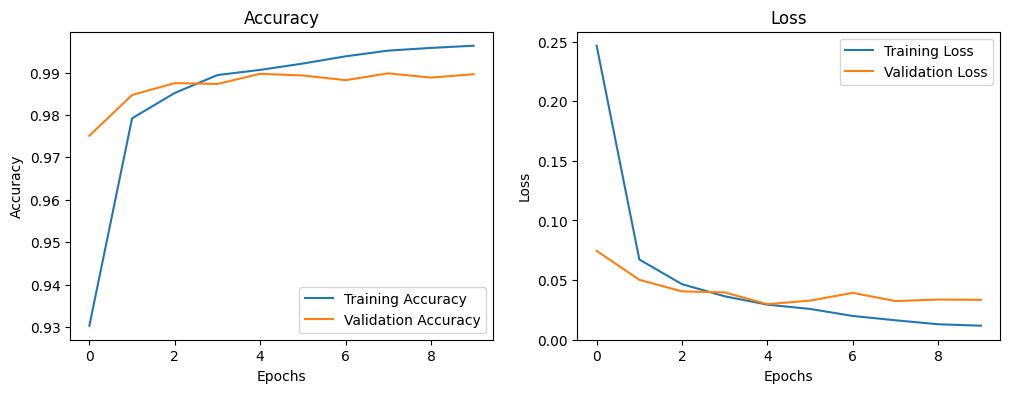

1/1 [==============================] - 0s 104ms/step


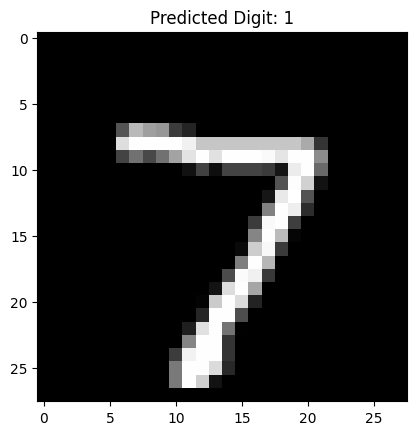

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing the data
# Reshape the data to fit the model (28x28 images with 1 color channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define the model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predicting on new data
def predict_digit(image):
    image = np.array(image).reshape(-1, 28, 28, 1).astype('float32') / 255
    prediction = model.predict(image)
    return np.argmax(prediction)

# Testing the function
sample_image = X_test[0]
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predict_digit(sample_image)}")
plt.show()
